# Gráficos de linha e passagem do tempo

Nessa aula, vamos introduzir gráficos que lidem com a passagem do tempo. Vamos focar em gráficos de linha, que são comumente utilizados para representer a variação de determinada medida ao longo do tempo.

## Introdução

Nas aulas anteriores vimos como griar gráficos de barra de tipos diferentes e com propósitos distintos. Um ponto comum desses gráficos é a necessidade de abordar uma variável como categoria, para representar barras diferentes.

Nessa aula iremos ver como criar gráficos que nos auxiliem a entender como uma variável numérica se comporta ao longo do tempo. Para isso, precisamos ter alguma variável que represente o tempo, como uma data, ou mesmo ano ou meses representados numericamente.

Nosso instrumento principal será o gráfico de linha, através da função `sns.lineplot()`. Essa função é muito similar a `sns.barplot()`, mas ao invés de barras, ela plota linhas que conectam nossas observações. Se checarmos a documentação, ela também permite muito mais alterações, mas não precisamos nos preocupar com isso agora.

Um ponto importante quando lidamos com dados temporais é que há uma convenção muito estabelecidade de representar variáveis temporais no eixo X. Assim, ainda que não haja nenhum impedimento técnico a representar nossa variável temporal no eixo Y, ela seria muito pouco usual. É importante termos isso em mante ao criar nossos gráficos.

Vamos começar importando as biblotecas e carregandos os dados como de costume.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://bit.ly/idh_tidy")

df.head()

,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
0,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,1990,0.284,45.967,2.936460,0.871962,...,43.709,4.532768,1.493952,NaN,NaN,NaN,NaN,NaN,0.189279,10.694796
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,1990,0.649,73.144,11.579340,7.354632,...,70.050,11.988330,7.920670,5972.920553,NaN,NaN,45.22,50.78,1.675414,3.295066
2,DZA,Argélia,Alto,Países Árabes,93.0,1990,0.593,67.416,9.797890,4.614608,...,66.313,NaN,6.020075,NaN,3.157895,96.842105,NaN,NaN,3.007186,25.518074
3,AND,Andorra,Muito Alto,NaN,35.0,1990,NaN,78.406,9.567167,NaN,...,75.279,10.297096,NaN,NaN,7.142857,92.857143,NaN,NaN,7.592078,0.053569
4,AGO,Angola,Mediano,África Sub-sahariana,150.0,1990,NaN,41.893,3.755630,NaN,...,38.674,4.126055,NaN,NaN,9.545455,90.454545,NaN,NaN,0.430303,11.828637


Vamos continuar utilizando os dados referentes ao IDH, assim como na aula anterior. Para conferir a descrição de cada variável revisite o texto da aula anterior.

Contudo, agora vamos usar a versão sem filtrar os dados apenas para 2022, assim temos um panorama histórico de cada país.

Além disso, chamamos nossos dados de um nome genérico, `df`. Isso é uma prática bem comum em usuários do pandas, e é uma abreviação de "DataFrame", que é o tipo de objeto que armazena nossos dados. Por outro lado, é um nome que não descreve o conteúdo dos dados.

Na aula de hoje vamos usar as seguintes variáveis:

- grupo_idh: Grupo de IDH do país
- extra_co2: Emissão de CO2 per capita em toneladas

## Lineplot

Vamos fazer um gráfico de linha base para começar a entender e pensar como utilizá-lo. [Aqui](https://seaborn.pydata.org/generated/seaborn.lineplot.html) está a documentação da função completa.

Vamos representar a emissão per capita no eixo Y e o ano no eixo X.

<Axes: xlabel='ano', ylabel='extra_co2'>

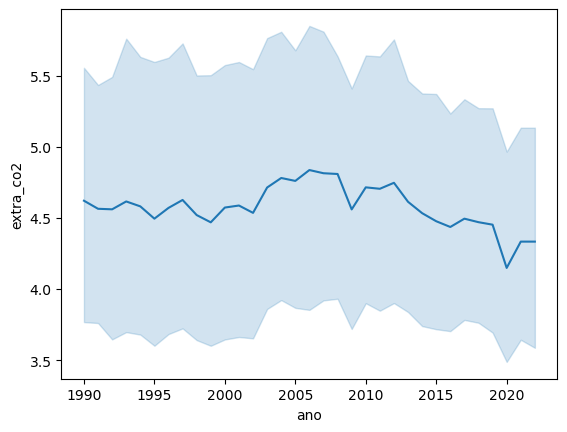

In [2]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    data=df,
)

Como nossa representação do ano já se assemelha a uma categoria, poderíamos representar a mesma informação por um gráfico de barras.

Veja como o gráfico de linha já faz alguns ajustes mais apropriados para representar a passagem do tempo.

<Axes: xlabel='ano', ylabel='extra_co2'>

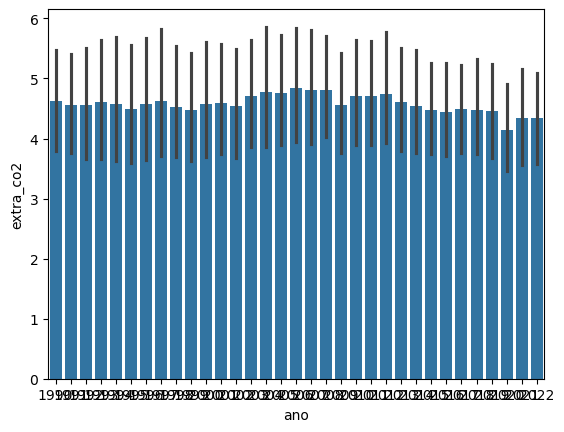

In [3]:
sns.barplot(
    x="ano",
    y="extra_co2",
    data=df,
)

Vamos focar na parte técnica de início, deixando de lado a tendência observada nos dados.

Primeiro: o gráfico de linha não mostra todo valor representado no eixo X. No gráfico de barras essa informação é necessária para identificar a categoria de cada barra. Contudo, o gráfico de linha é uma representação contínua da passagem do tempo, assim podemos ocultar parte dos valores. A rigor, o gráfico de barras sequer garante que a ordem das barras seja a ordem temporal.

Além disso, no gráfico de linhas o eixo Y não começa em zero, ao contrário do gráfico de barras. Nesse tipo de visualização essa prática é aceitável porque o gráfico de linhas tem como objetivo enfocar a variação da variável. Além disso, a posição da linha não cria uma associação tão forte com o valor como acontece com a altura da barra. Contudo, isso não seria apropriado em um gráfico de barras.

## Ajustando nosso lineplot

Como mencionado no início, o gráfico de linha tem funcionamento muito similar ao de barra. Assim como `sns.barplot()`, `sns.lineplot()` está criando uma barra de erro (no caso, uma sombra ao redor da linha) em torno da média, que é o estimador padrão. Isso ocorre porque cada ano tem várias observações.

Poderíamos mudar esse comportamento com os argumentos `estimator` e `errorbar`, como fizemos anteriormente. Contudo, a média da emissão média per capita por país não parece revelar informações muito interessantes, além de sua queda nos anos recentes.

Uma ideia interessante pode ser que países de regiões diferentes podem ter evoluído de forma diferente. Vamos testar isso introduzindo o argumento `hue="regiao"`

Como já estamos acostumados com fazer usar argumentos em nossos gráficos, vamos também remover a barra de erro.

<Axes: xlabel='ano', ylabel='extra_co2'>

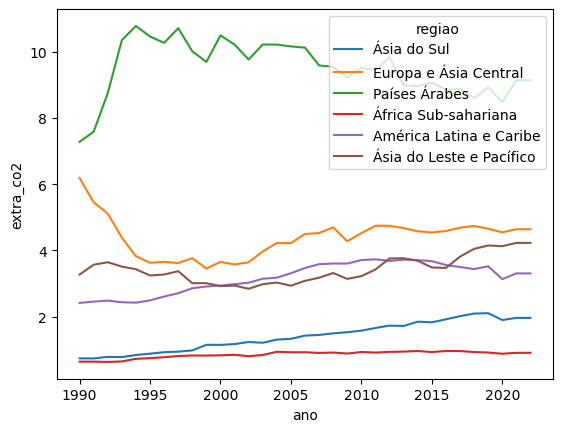

In [4]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="regiao",
    errorbar=None,
    data=df,
)

Um problema inicial é que a legenda está muito grande e atrapalha a visualização. Para resolver isso vamos aumentar o tamanho da figura, deixando mais espaço para a legenda.

<Axes: xlabel='ano', ylabel='extra_co2'>

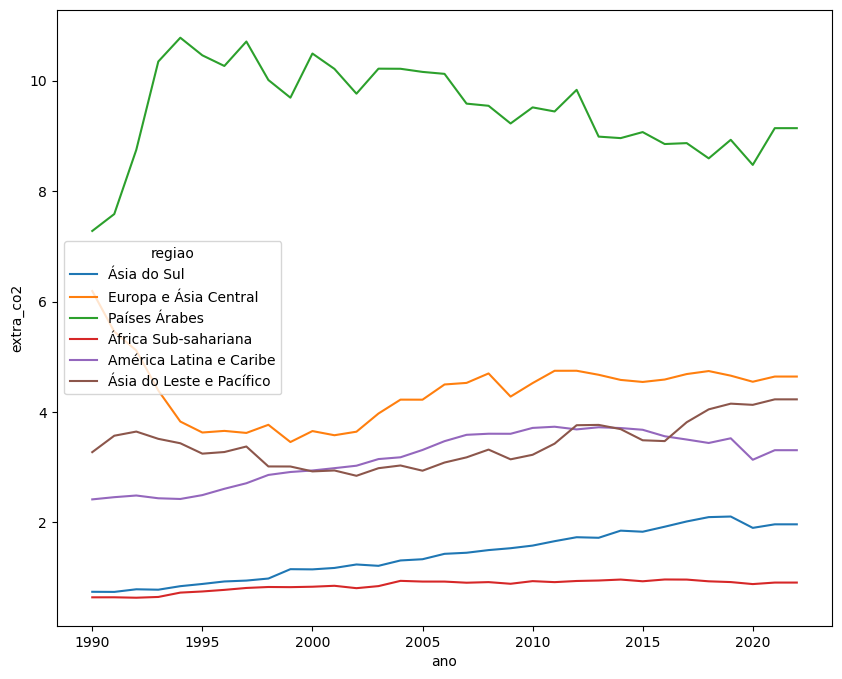

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="regiao",
    errorbar=None,
    data=df,
    ax=ax,
)

Podemos ver algumas partes do gráfico um pouco melhor. Mas o resultado continua não sendo muito bom. Vamos abordar como alterar a legenda mais adiante no curso.

De todo modo, temos alguma ideia do que está acontecendo entre as diferentes regiões.

**Desafio**: Vamos deixar um exercício para praticar também a parte de comunicar nossos achados. Como podemos descrever o gráfico acima para um potencial interlocutor? Qual padrão podemos observar para as regiões com o passar do tempo?

Vamos passar para uma nova pergunta, mudando o que utilizamos no `hue`: será que países com IDHs diferentes se comportaram de forma diferente em relação a emissão de CO2?

Vamos mudar o valor da `hue` para `grupo_idh`, e ver se países que atualmente tem IDHs mais altos ou mais baxos tiveram comportamentos diferentes ao longo do tempo.

<Axes: xlabel='ano', ylabel='extra_co2'>

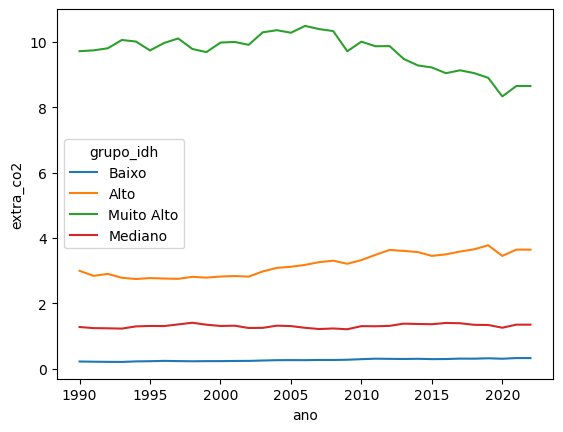

In [6]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    errorbar=None,
    data=df,
)

O `lineplot` oferece outra codificação visual que podemos usar para representar variáveis categórias: o estilo da linha. Podemos usá-la no lugar do `hue` ou para adicionar outra variável. Vamos ver alguns exemplos substituindo o hue:

<Axes: xlabel='ano', ylabel='extra_co2'>

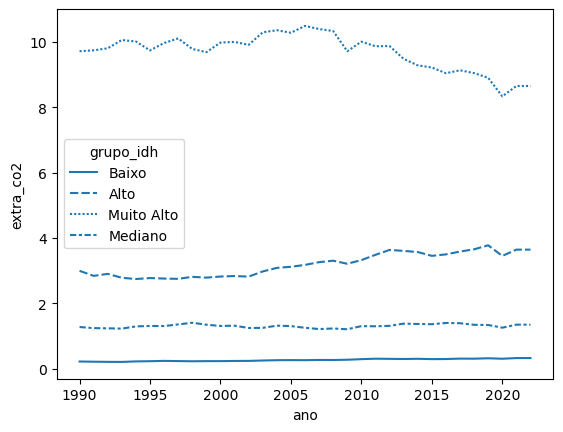

In [7]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    style="grupo_idh",
    errorbar=None,
    data=df,
)

Quando usamos o `style` podemos incluir também marcadores diferentes para cada linha com o argumento `markers=True`, ou se vamos usar linhas tracejadas com o dashes. Vamos testar isso.:

<Axes: xlabel='ano', ylabel='extra_co2'>

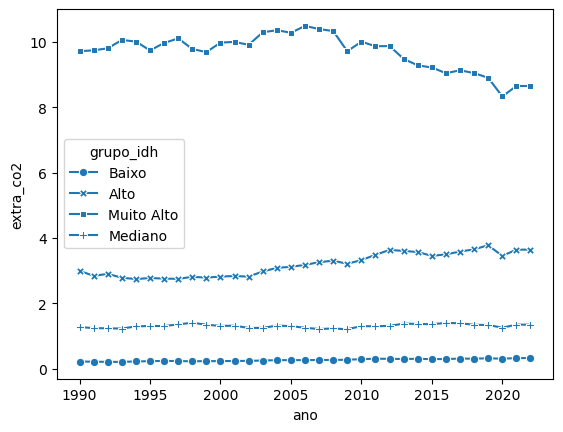

In [8]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    style="grupo_idh",
    markers=True, # adiciona marcador das observações
    dashes=False, # Faz com que todas as linhas sejam sólidasC
    errorbar=None,
    data=df,
)

Como temos muitas observações do ano, para nosso problema usar marcadores não parece uma boa opção. Contudo, aprendemos aqui um novo recurso que pode fazer sentido em outras análises.

Vamos voltar para as cores e o argumento `hue`. No capítulo 2, vimos rapidamente que podemos estabelecer uma paleta de cores com o argumento `palette`. Isso nos permite definir não apenas uma cor para todo o gráfico, mas um conjunto de cores a ser utilizado quando introduzimos o argumento `hue` para dif.=erenciar categorias.

Vamos praticar isso agora, definindo uma paleta de cores para as regiões.

# Paletas de cores - revisitando

Uma primeira opção é usar uma paleta de cores já definida pelo seaborn, assim como fazemos com cores. Esse [apêndice do curso "Practical Python for Data Science"](https://www.practicalpythonfordatascience.com/ap_seaborn_palette) e [esse site sobre paletes no seaborn](https://r02b.github.io/seaborn_palettes/) apresentam uma boa listagem de paletas já disponíveis.

O seaborn também nos permitiria criar uma paleta a partir de cores específicas de vários modos. [A página sobre paletas do seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html) tem uma boa explicação sobre isso e alguns aspectos de cor. Contudo, nem sempre precisamos de tanta complexidade.

Vamos usar a paleta `"Blues"`.

<Axes: xlabel='ano', ylabel='extra_co2'>

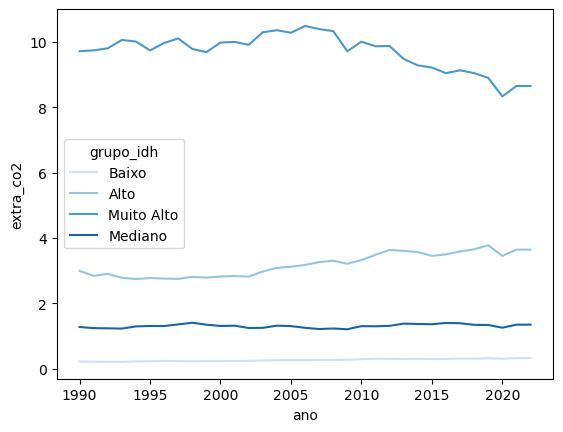

In [9]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh", # definimos a variável que definirá a cor
    palette="Blues", # nome da paleta
    errorbar=None,
    data=df,
)

Um ponto estranho que ficou destacado com essa paleta é que a ordem do Hue não segue que esperamos pelo sentido: Mediano é o último valor e ficou com uma cor mais escura que Muito Alto. Poderíamos arrumar essa ordem.

Outra coisa que podemos fazer é escolher exatamente quais cores queremos usar em nosso gráfico. 

Para fazer isso precisamos criar uma lista. Listas são um tipo de objeto em Python que armazena vários valores. Podemos criar uma lista de cores, e passar essa lista para o argumento `palette` ou `hue_order`.

Criamos listas em Python usando colchetes `[]`, e separamos os valores com vírgulas. Esses valores podem ser de qualquer tipo, no nosso caso precisaremos de listas de texto (strings) que representem cores ou as categorias. Assim, cada elemento da lista estar entre aspas.

Vamos primeiro estabelecer a ordem que desejamos para o grupo de IDH. Vamos criar uma variável chamada `ordem_grupos` e passar ela para o argumento `hue_order`.

<Axes: xlabel='ano', ylabel='extra_co2'>

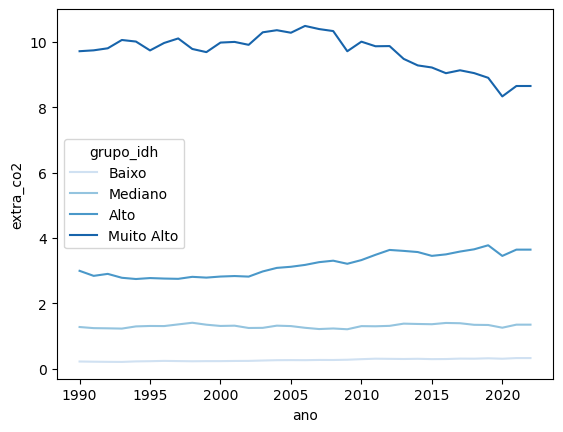

In [11]:
ordem_grupos = ["Baixo", "Mediano", "Alto", "Muito Alto"]

sns.lineplot(
    x="ano",
    y="extra_co2a",
    hue="grupo_idh",
    palette="Blues",
    hue_order=ordem_grupos,
    errorbar=None,
    data=df,
)

Ao acertar a ordem também consertamos a intensidade da cor para a paleta que estavamos usando.

**ATENÇÃO**: Se você escrever o nome dos grupos de forma diferente de como estão nos dados, o seaborn não vai entender que você está se referindo a mesma categoria. A consequência é que essa categoria é **excluída do gráfico.** Isso é um erro comum, para checar como elas estão escritas uma opção é fazer o gráfico sem a ordem e ver exatamente como elas estão escritas e depois alterar a visualização.

Podemos também criar uma paleta de cores personalizada. Vamos criar uma lista de cores e passar para o argumento `palette`.

<Axes: xlabel='ano', ylabel='extra_co2'>

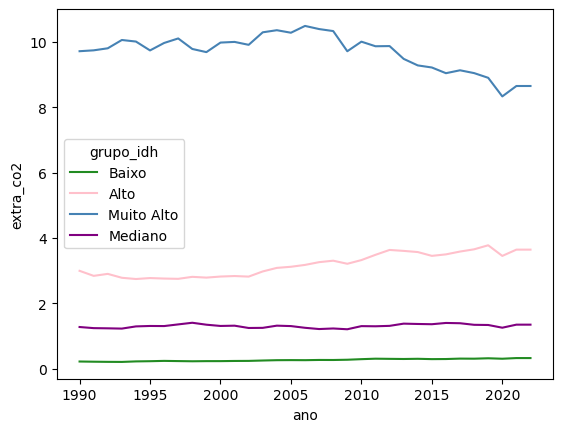

In [12]:
lista_cores = ["forestgreen", "pink", "steelblue", "purple"]

sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette=lista_cores,
    errorbar=None,
    data=df,
)

Claro, poderíamos combinar as duas abordagens.

**Aviso**: O código abaixo depende que as duas células anteriores tenham sido executadas para carregar as variáveis `ordem_grupos` e `lista_cores`.

<Axes: xlabel='ano', ylabel='extra_co2'>

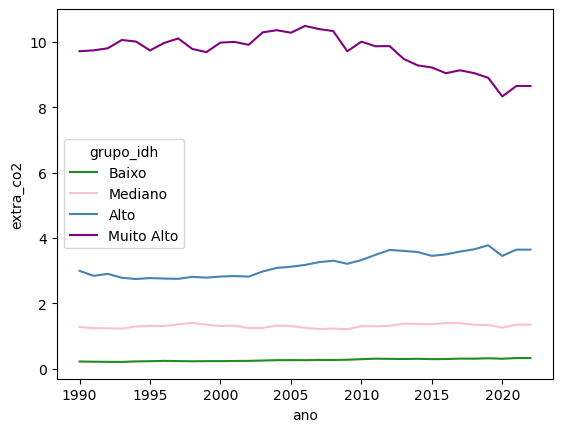

In [13]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette=lista_cores,
    hue_order=ordem_grupos,
    errorbar=None,
    data=df,
)

Temos também uma outra forma de estabelecer exatamente a cor que queremos para cada categoria, sem precisar estabelecer a ordem das categorias.

Para fazer isso precisamos de uma outra estrutura do Python, um dicionário. Dicionários são uma estrutura de dados que armazena pares de chave e valor. Cada chave é única e associada a um valor. Em nosso caso, a chave é a categoria e o valor é a cor que queremos associar a ela.

Vamos criar um dicionário chamado `cores_grupo`.

In [16]:
cores_grupos = {
    "Baixo": "lightblue",
    "Mediano": "pink",
    "Alto": "forestgreen",
    "Muito Alto": "steelblue",
}

Alguns detalhes importantes sobre como criar dicionários:

1. Dicionários são criados com chaves `{}`.
2. Separamos cada chave de seu valor com dois pontos `:`.
3. Cada par chave-valor é separado por vírgula.
4. Os valores podem ser de qualquer tipo, inclusive listas, ou outros dicionários. Em nosso caso, os valores são strings porque queremos representar o nome das cores.

Vamos passar esse dicionário para o argumento `palette`.

<Axes: xlabel='ano', ylabel='extra_co2'>

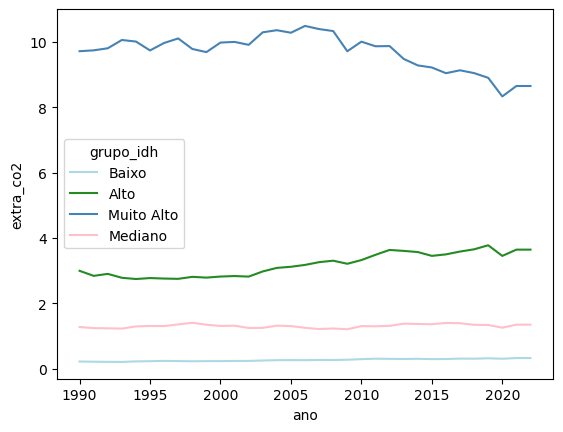

In [17]:
sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette=cores_grupos,
    errorbar=None,
    data=df,
)

Vamos agora aplicar também o que aprendemos na última aula sobre aprimorar a visualização. Vamos adicionar um título ao gráfico e aos eixos.

Text(0.5, 0, '')

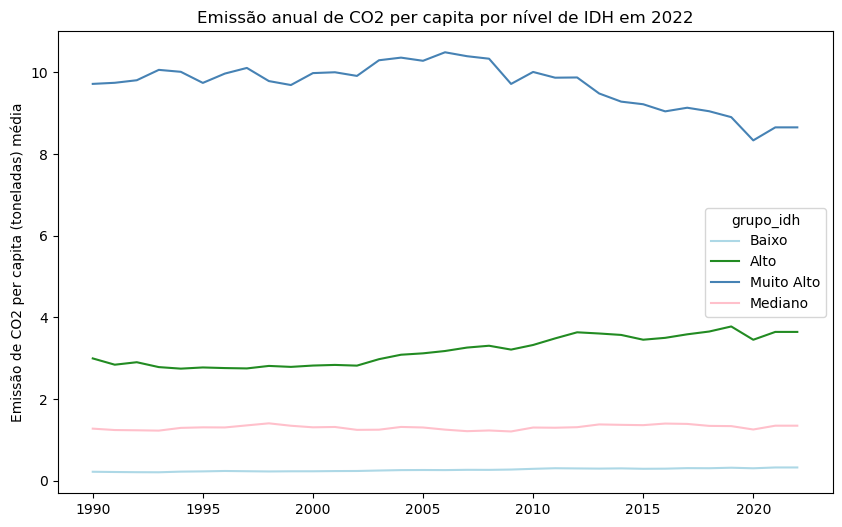

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette=cores_grupos,
    errorbar=None,
    data=df,
    ax=ax,
)

ax.set_title("Emissão anual de CO2 per capita por nível de IDH em 2022")

ax.set_ylabel("Emissão de CO2 per capita (toneladas) média")
ax.set_xlabel("") # vamos deixar o eixo X sem rótulo, já que o título já explica


## Desafios

### 1

Vamos praticar um pouco do que aprendemos.

Crie um gráfico de linha, mas estabeleça ordem decrescente nas categorias utilizando o argumento `hue_order`. Além disso, utilize como paleta de cores a paleta `"Greys_r"`.

<Axes: xlabel='ano', ylabel='extra_co2'>

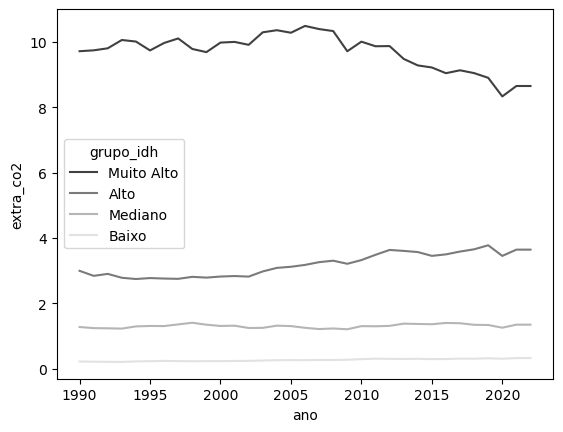

### 2

Tente descrever o gráfico acima para um potencial interlocutor. O que você observa sobre a emissão de CO2 per capita ao longo do tempo para países com diferentes IDHs?

A tendência é a mesma para todos os grupos de IDH?

Se quiser você pode usar o espaço abaixo para escrever sua resposta.

## Gráfico final

Como de costume, vamos criar um gráfico final que vai incluir alguns ajustes além do que já aprendemos.

(1990.0, 2020.0)

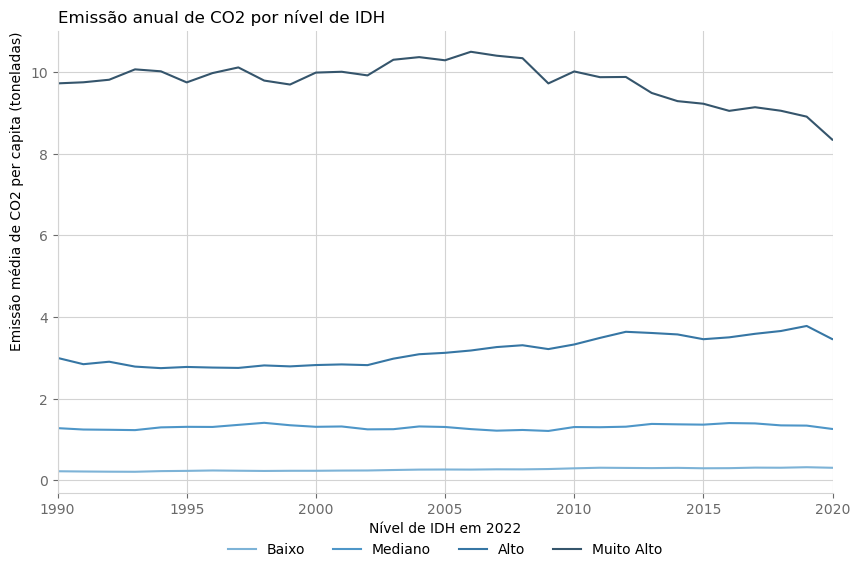

In [69]:
# Vamos colocar linhas para ajudar a visualizar melhor
# mas deixá-las mais claras para chamar menos atençao
sns.set_style(
    # style="whitegrid",
    rc={
        "axes.edgecolor": "lightgray",
        "ytick.color": "dimgrey",
        "xtick.color": "dimgrey",
        "axes.grid": True,
        "grid.color": "lightgray",
        "axes.axisbelow": True,
    },
)

ordem_categorias = ["Baixo", "Mediano", "Alto", "Muito Alto"]

# Código que aprendemos a fazer
fig, ax = plt.subplots(figsize=(10, 6))

sns.despine(ax=ax)

sns.lineplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette="Blues_d",
    hue_order=ordem_categorias,
    errorbar=None,
    data=df,
    ax=ax,
)

ax.set_title("Emissão anual de CO2 por nível de IDH", loc="left")
ax.set_ylabel("Emissão média de CO2 per capita (toneladas)", loc="top")
ax.set_xlabel("") # vamos deixar o eixo X sem rótulo, já que o título já explica

# vamos mover a legenda para baixo do gráfico e fazer alguns ajustes
ax.legend(title="Nível de IDH em 2022", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
ax.set_xlim(1990, 2020)

Vamos criar também um gráfico que enfatiza a variação total entre os grupos de IDH.

Vamos começar a ver como filtrar os dados nas próximas aulas. Isso nos permitiria fazer um gráfico desse tipo.

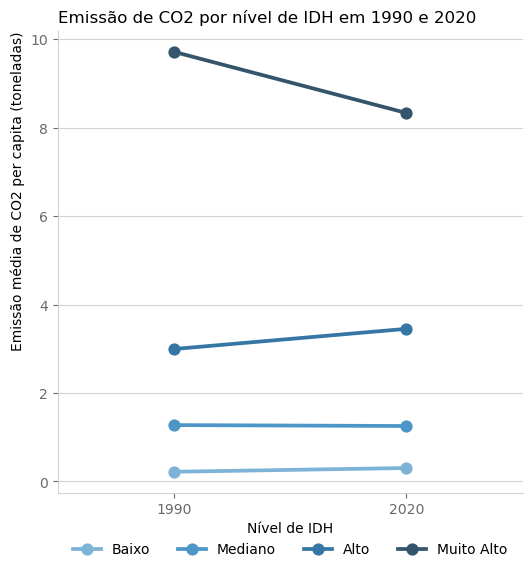

In [70]:
df_inicio_fim = df.query("ano == 1990 or ano == 2020")

fig, ax = plt.subplots(figsize=(6, 6))

sns.despine(ax=ax)

sns.pointplot(
    x="ano",
    y="extra_co2",
    hue="grupo_idh",
    palette="Blues_d",
    errorbar=None,
    hue_order=ordem_categorias,
    data=df_inicio_fim,
    ax=ax,
)

ax.set_title("Emissão de CO2 por nível de IDH em 1990 e 2020", loc="left")
ax.set_ylabel("Emissão média de CO2 per capita (toneladas)", loc="top")
ax.set_xlabel("") 

ax.legend(title="Nível de IDH", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

## Conclusão

Nessa aula vimos como usar lineplots para apresentar dados que enfatizam a passagem do tempo.

Vimos em detalhe como controlar as cores de nosso gráfico quando queremos diferenciá-las por uma variável categórica, e também como estabelecer ordem para essa variável.

Parabéns, se você chegou até aqui já pode ter um grande controle sobre o estilo de seus gráficos. Além disso, no caminho aprendemos um pouco sobre listas e dicionários, que são estruturas de dados muito importantes em Python.